# SoftVQ-VAE: Efficient 1D Continuous Tokenizer

In [1]:
import torch
from PIL import Image
import numpy as np
import requests
import sys 
sys.path.append('../')
from modelling.tokenizer import SoftVQModel
from matplotlib import pyplot as plt

/home/haoc/storage/miniconda3/envs/softvq/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/storage/home/haoc/storage/continuous_tokenizer/demo/../modelling/modules/timm_vit/vision_transformer.py:2182: UserWarning: Overwriting vit_tiny_patch16_224 in registry with modelling.modules.timm_vit.vision_transformer.vit_tiny_patch16_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  def vit_tiny_patch16_224(pretrained: bool = False, **kwargs) -> VisionTransformer:
/storage/home/haoc/storage/continuous_tokenizer/demo/../modelling/modules/timm_vit/vision_transformer.py:2191: UserWarning: Overwriting vit_tiny_patch16_384 in registry with modelling.modules.timm_vit.vision_transformer.vit_tiny_patch16_384. This is because the name being registered 

In [2]:
def show_image(image, title=''):
    # image is [H, W, 3]
    assert image.shape[2] == 3
    plt.imshow(torch.clip((image * 0.5 + 0.5) * 255, 0, 255).int())
    plt.title(title, fontsize=16)
    plt.axis('off')
    return

## Load Model

In [3]:
vae = SoftVQModel.from_pretrained("SoftVQVAE/softvq-l-64")
vae = vae.eval()
if torch.cuda.is_available():
    vae = vae.cuda()
    device = torch.device('cuda')
    device_type = 'cuda'
else:
    device = torch.device('cpu')
    device_type = 'cpu'

## Load Image

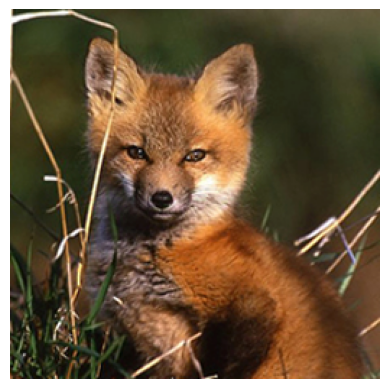

In [4]:
# load an image
img_url = 'https://user-images.githubusercontent.com/11435359/147738734-196fd92f-9260-48d5-ba7e-bf103d29364d.jpg' # fox, from ILSVRC2012_val_00046145
# img_url = 'https://user-images.githubusercontent.com/11435359/147743081-0428eecf-89e5-4e07-8da5-a30fd73cc0ba.jpg' # cucumber, from ILSVRC2012_val_00047851
img = Image.open(requests.get(img_url, stream=True).raw)
img = img.resize((256, 256))
img = np.array(img) / 255.

assert img.shape == (256, 256, 3)

# normalize by ImageNet mean and std
img = img - 0.5
img = img / 0.5

show_image(torch.tensor(img))

## Reconstruction

In [5]:
input_img = torch.tensor(img).permute(2, 0, 1).unsqueeze(0).float().to(device)
with torch.amp.autocast(device_type=device_type) and torch.no_grad():
    recon_img, _, _ = vae(input_img)
recon_img = recon_img[0].cpu().permute(1, 2, 0).numpy()

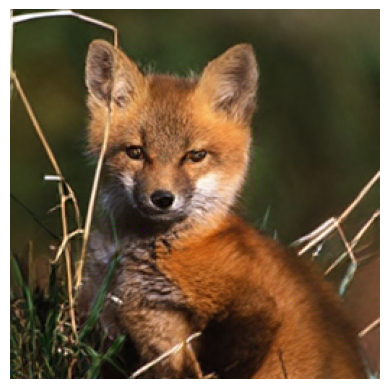

In [6]:
# visualization
show_image(torch.tensor(recon_img))